In [1]:
!pip install pandas --upgrade

Requirement already up-to-date: pandas in /home/nick/anaconda3/lib/python3.8/site-packages (1.1.3)


In [44]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remove NaNs

In [2]:
# Explore NaNs

In [28]:
batting_df[batting_df['player_id'] == 'aaronha01'].columns

Index(['player_id', 'year', 'stint', 'team_id', 'league_id', 'g', 'ab', 'r',
       'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb',
       'hbp', 'sh', 'sf', 'g_idp'],
      dtype='object')

In [3]:
# How many NaNs per column per year? does it change over time?

# Preprocessing steps:
#     -Drop all players who started playing before 1913 (when strikeouts started being recorded)
#     -Drop all with ab==NaN; eliminates spike in late 1970s
#
#     -When normalizing over each year, compare to *all* players from 1913, not just the new ones

In [29]:
batting_df

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101328,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,33.0,1.0,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0
101329,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,23.0,2.0,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0
101330,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [4]:
batting_df = pd.read_csv('data/batting.csv')

In [5]:
# if AB is nan, all other stats are also nan; these players should be dropped
players_with_nans = batting_df[batting_df['year'] == 1973][batting_df['ab'].isnull()]['player_id'].values
players_with_nans

<ipython-input-5-a71b99271f4b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  players_with_nans = batting_df[batting_df['year'] == 1973][batting_df['ab'].isnull()]['player_id'].values


array(['abbotgl01', 'alburvi01', 'alexado01', 'allenll01', 'allenll01',
       'baldwda01', 'baneed01', 'barbest01', 'beenefr01', 'bellje01',
       'blylebe01', 'bolinbo01', 'bosmadi01', 'bosmadi01', 'brownja01',
       'burgmto01', 'busketo01', 'campbbi02', 'clydeda01', 'colboji01',
       'colemjo05', 'corbira01', 'coxca01', 'cuellmi01', 'culpra01',
       'curtijo01', 'deckejo01', 'dobsoch01', 'dobsopa01', 'dunnist01',
       'farmeed01', 'farmeed01', 'fifeda01', 'fisheed02', 'fitzmal01',
       'frailke01', 'frymawo01', 'gardnro01', 'gardnro01', 'garlawa01',
       'garmami01', 'geddeji01', 'goltzda01', 'grangwa01', 'hamilda01',
       'handri01', 'handri01', 'handsbi01', 'hasslan01', 'henniri01',
       'hilgeto01', 'hillejo01', 'holdsfr01', 'hooddo01', 'hudsoch01',
       'ignasga01', 'jacksgr01', 'jacksmi01', 'jacksmi01', 'jeffeje01',
       'johnsba01', 'johnsje01', 'kaatji01', 'kealest01', 'kekicmi01',
       'kilkemi01', 'klinest01', 'kobelke01', 'kremmji01', 'lagrole01',
  

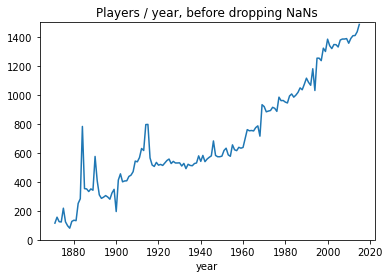

In [6]:
# num samples / year
batting_df.groupby('year')['player_id'].agg('count').plot(title='Players / year, before dropping NaNs', ylim=(0, 1500))

In [7]:
# Where columns are missing:

#    SH before 1895
#    HBP before 1887
#    RBI 1882, 1884
#    SB 1876-85
#    SO 1882-1912

#    Drop below columns - less important stats
#    CS 1876-1950
#    SF -1954    
#    G_IDP -1939 
#    IBB -1955

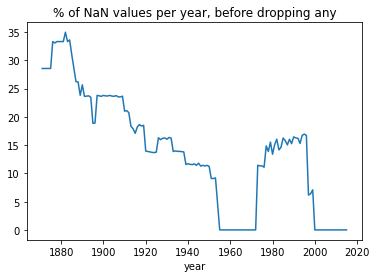

In [8]:
# % NaN per column per year
year_stat_nan_df = batting_df.groupby('year').agg(lambda X: X.isna().sum() / len(X) * 100)
year_stat_nan_df.mean(axis=1).plot(title='% of NaN values per year, before dropping any')

In [9]:
# Drop where ab is NaN; gets rid of late 1900s spike
batting_no_nan_df = batting_df[batting_df['ab'].notna()]

# Drop players who started before 1913
player_first_years_df = batting_no_nan_df.groupby('player_id')['year'].min()
played_after_1913 = player_first_years_df[batting_no_nan_df['player_id']] >= 1913
batting_no_nan_df = batting_no_nan_df[played_after_1913.values]

# get indexes of samples corresponding to players who started after 1913
valid_sample_idxs = batting_no_nan_df.index
valid_sample_idxs

Int64Index([ 13808,  13811,  13817,  13825,  13831,  13833,  13836,  13837,
             13840,  13843,
            ...
            101322, 101323, 101324, 101325, 101326, 101327, 101328, 101329,
            101330, 101331],
           dtype='int64', length=79574)

Text(0, 0.5, '# of players')

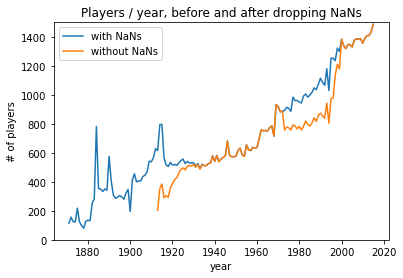

In [50]:
batting_df.groupby('year')['player_id'].agg('count').plot(title='Players / year, before and after dropping NaNs', ylim=(0, 1500))
batting_no_nan_df.groupby('year')['player_id'].agg('count').plot(title='Players / year, before and after dropping NaNs', ylim=(0, 1500))
plt.legend(['with NaNs', 'without NaNs'])
plt.ylabel('# of players')


# Normalization

In [15]:
# Select useful columns
batting_df_for_norm = batting_df[['player_id', 'year', 'g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'bb', 'so', 'hbp', 'sh']][batting_df['year'] >= 1913]
batting_df_for_norm[batting_df_for_norm['year'] == 2015].mean()

year      2015.000000
g           47.465680
ab         111.364738
r           13.894347
h           28.335128
double       5.546433
triple       0.631898
hr           3.303499
rbi         13.223419
sb           1.685734
bb           9.470390
so          25.199192
hbp          1.078062
sh           0.807537
dtype: float64

In [16]:
# normalize per year
yearly_means = batting_df_for_norm.groupby('year').mean()
yearly_stds = batting_df_for_norm.groupby('year').std()
yearly_means

,g,ab,r,h,double,triple,hr,rbi,sb,bb,so,hbp,sh
year,,,,,,,,,,,,,
1913,43.954545,131.844156,16.168831,34.125000,4.983766,2.055195,0.762987,13.555195,5.275974,11.797078,15.069805,1.139610,4.125000
1914,51.462893,154.197484,18.276730,39.155975,5.817610,2.187421,0.893082,15.376101,5.752201,14.016352,18.562264,1.246541,5.267925
1915,50.566583,152.894472,17.855528,38.266332,5.693467,2.222362,0.797739,15.051508,5.158291,13.969849,17.613065,1.275126,5.579146
1916,49.100885,144.996460,15.732743,35.902655,5.300885,2.019469,0.677876,13.306195,4.872566,12.523894,16.874336,1.134752,5.007080
1917,52.494186,159.021318,17.344961,39.517442,5.637597,2.205426,0.649225,14.645349,4.676357,13.391473,16.821705,1.122093,5.967054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,49.480922,119.298056,14.980562,30.429806,6.046796,0.646508,3.277178,14.257739,2.360691,10.812095,24.829374,1.118790,1.200144
2012,49.374290,117.365767,14.926847,29.874290,5.867188,0.658381,3.504261,14.203125,2.293324,10.446733,25.870739,1.061080,1.050426
2013,49.161107,117.863733,14.375444,29.874379,5.835344,0.547906,3.308020,13.677076,1.911285,10.390348,26.053939,1.090135,0.981547


In [17]:
batting_df_norm_year = batting_df_for_norm.apply(lambda row: (row - yearly_means.loc[row['year']]) / yearly_stds.loc[row['year']], axis=1)

In [18]:
batting_df_norm_year

,ab,bb,double,g,h,hbp,hr,player_id,r,rbi,sb,sh,so,triple,year
13808,-0.635019,-0.415339,-0.621050,-0.669304,-0.559610,-0.522644,-0.376671,NaN,-0.517131,-0.588387,-0.315670,-0.641496,-0.761674,-0.287125,NaN
13809,-0.101314,-0.575144,0.126638,-0.019993,-0.022384,-0.522644,-0.376671,NaN,-0.124438,-0.026019,-0.508389,-0.174953,0.054209,-0.015019,NaN
13810,-0.742895,-0.575144,-0.621050,-0.836868,-0.678993,-0.522644,-0.376671,NaN,-0.634939,-0.635251,-0.508389,-0.641496,-0.819951,-0.559231,NaN
13811,0.994484,0.436957,0.500481,1.278627,0.594430,2.687669,0.610688,NaN,0.425332,0.489486,0.551563,0.913645,1.977362,0.801300,NaN
13812,0.551623,0.010809,-0.122592,0.838772,0.295971,0.853205,0.610688,NaN,0.386063,0.302030,1.129719,-0.330467,1.511143,0.529193,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,-0.636768,-0.542078,-0.581714,-0.993030,-0.596542,-0.432258,-0.481103,NaN,-0.579583,-0.562494,-0.344902,-0.459276,-0.659481,-0.408597,NaN
101328,0.706929,1.346818,1.515901,0.436251,0.729802,-0.432258,0.392703,NaN,1.047247,0.841251,-0.140301,-0.459276,0.020958,0.884641,NaN
101329,0.689776,1.117861,1.096378,0.257590,0.792961,-0.031300,0.538338,NaN,0.963820,0.415874,0.064299,-0.459276,0.125641,0.238022,NaN
101330,1.364483,0.659947,0.571974,1.441214,0.687696,1.572533,1.120876,NaN,0.588398,0.628562,-0.344902,4.090622,2.795055,-0.408597,NaN


In [20]:
batting_df_norm_year['year'] = batting_df_for_norm['year']
batting_df_norm_year['player_id'] = batting_df_for_norm['player_id']
# mean and std are (0, 1)
display(batting_df_norm_year.groupby('year').mean())
batting_df_norm_year.groupby('year').std()

,ab,bb,double,g,h,hbp,hr,r,rbi,sb,sh,so,triple
year,,,,,,,,,,,,,
1913,7.414253e-17,4.298510e-17,1.874403e-17,1.725712e-17,2.212336e-17,1.721431e-16,1.667137e-16,2.705718e-17,5.384401e-17,1.261617e-18,1.502113e-17,7.209240e-19,7.301890e-17
1914,-8.099740e-17,-2.122691e-17,2.569573e-17,-6.926674e-17,3.910219e-17,1.251096e-16,-2.960595e-16,8.379042e-18,1.899249e-17,-5.222936e-17,4.915704e-17,4.636403e-17,1.117206e-17
1915,-2.287394e-17,-2.733715e-17,-7.196923e-17,2.287394e-17,6.583232e-17,8.619571e-17,-1.696019e-16,-4.016887e-17,7.475874e-17,-2.064234e-17,-1.450543e-17,4.240048e-17,7.503769e-17
1916,-4.932141e-17,-4.067543e-17,-9.746383e-17,6.140614e-17,8.194035e-17,1.259828e-16,-1.563646e-16,-1.120048e-17,2.054404e-16,7.604536e-17,8.164560e-17,-5.718140e-17,-1.548417e-16
1917,3.356488e-17,-9.520808e-18,-1.394234e-16,-2.323723e-17,-5.508083e-17,-1.382400e-17,7.745742e-18,-7.745742e-18,-6.024466e-17,3.184361e-17,-1.420053e-17,-4.991700e-17,-5.034732e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,8.888179e-17,-7.385501e-17,6.522261e-17,5.818879e-17,0.000000e+00,9.771401e-17,-1.384382e-16,-6.873951e-17,-2.046199e-17,6.925106e-16,-2.427064e-16,-2.941412e-17,-1.189353e-16
2012,-1.923966e-17,-1.318390e-16,8.799779e-17,-1.545481e-17,-6.781192e-17,-1.551000e-16,-1.100761e-16,1.640102e-17,-1.021910e-16,1.356238e-17,-1.777697e-16,-2.617855e-17,5.519575e-17
2013,7.024584e-17,-4.928634e-17,6.090862e-17,-6.626668e-17,6.258301e-17,1.717733e-16,9.408135e-17,-1.213839e-16,-9.320599e-17,-1.806772e-16,-6.043585e-17,-2.698732e-16,-2.502139e-16


,ab,bb,double,g,h,hbp,hr,r,rbi,sb,sh,so,triple
year,,,,,,,,,,,,,
1913,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1914,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1915,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1916,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1917,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2012,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [156]:
batting_df_norm_year.iloc[batting_df_norm_year['hr'].argmax()]

ab            1.48231
bb            7.08534
double        2.80442
g             1.78987
h             2.10667
hbp          0.919812
hr            15.0613
player_id    ruthba01
r             4.62311
rbi           4.49577
sb            1.57337
sh          -0.107394
so            4.29996
triple        1.63277
year             1920
Name: 18517, dtype: object

In [158]:
# normalize per columns
col_means = batting_df_norm_year.drop(columns='year').mean(axis=0)
col_stds = batting_df_norm_year.drop(columns='year').std(axis=0)

batting_df_norm_year_cols = batting_df_norm_year.drop(columns=['year', 'player_id']).subtract(col_means, axis='columns').divide(col_stds, axis='columns')

In [193]:
batting_df_norm_year_cols['year'] = batting_df_for_norm['year']
batting_df_norm_year_cols['player_id'] = batting_df_for_norm['player_id']


# mean = 0, std = 1 per year
display(batting_df_norm_year_cols.groupby('year').mean())
display(batting_df_norm_year_cols.groupby('year').std())

# mean = 0, std = 1 per column
display(batting_df_norm_year_cols.mean(axis=0))
display(batting_df_norm_year_cols.std(axis=0))

,ab,bb,double,g,h,hbp,hr,r,rbi,sb,sh,so,triple
year,,,,,,,,,,,,,
1913,8.675870e-17,9.858636e-17,2.973812e-18,7.366943e-17,-2.775558e-17,4.665730e-17,1.148973e-16,2.171784e-17,7.125884e-17,2.843144e-17,-3.018869e-17,-3.334274e-18,-4.240779e-17
1914,-9.272806e-17,3.714708e-17,-5.921189e-17,-7.205976e-17,1.005485e-17,3.075807e-17,-4.156005e-16,-2.457852e-17,2.234411e-17,-7.429417e-17,2.639398e-17,6.759094e-17,-1.340647e-17
1915,-1.896863e-17,-3.347406e-18,4.128468e-17,5.495325e-17,2.510555e-17,-1.186934e-16,-3.124246e-17,-3.486881e-17,8.368515e-17,1.238540e-16,-3.291616e-17,4.797949e-17,1.048854e-16
1916,4.696342e-17,1.581822e-17,1.131838e-16,-6.297814e-17,-2.338346e-17,-1.511793e-16,-3.625910e-16,3.517344e-17,-1.413815e-16,1.748847e-17,2.185076e-16,5.655260e-16,-1.336198e-17
1917,3.270424e-17,2.850863e-17,-7.487551e-17,-3.614680e-17,-6.540849e-17,8.539143e-18,8.003933e-17,-2.840105e-17,-3.270424e-17,6.885104e-17,4.905637e-17,-8.606380e-17,6.024466e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,4.156342e-17,-5.754936e-17,-8.760291e-17,3.676765e-17,-2.557749e-18,1.644153e-16,-5.371273e-17,-8.472544e-17,-5.659020e-17,7.222444e-16,-4.557589e-16,1.150987e-17,-2.896651e-16
2012,-3.217124e-17,-2.270911e-17,-2.365532e-17,-2.996341e-17,1.513940e-17,-1.127570e-17,2.179443e-16,-1.069220e-16,-9.462128e-17,-2.143172e-16,-3.674460e-17,-3.185583e-17,2.393918e-16
2013,4.845899e-17,-1.215808e-16,8.070589e-17,-7.659869e-17,-9.731195e-18,-1.654697e-17,1.529807e-16,5.949030e-18,-3.132352e-17,1.260525e-16,2.050643e-16,4.239177e-17,-2.139287e-16


,ab,bb,double,g,h,hbp,hr,r,rbi,sb,sh,so,triple
year,,,,,,,,,,,,,
1913,1.00062,1.00062,1.00062,1.000583,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062
1914,1.00062,1.00062,1.00062,1.000583,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062
1915,1.00062,1.00062,1.00062,1.000583,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062
1916,1.00062,1.00062,1.00062,1.000583,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062
1917,1.00062,1.00062,1.00062,1.000583,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1.00062,1.00062,1.00062,1.000583,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062
2012,1.00062,1.00062,1.00062,1.000583,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062
2013,1.00062,1.00062,1.00062,1.000583,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062,1.00062


ab       -6.631013e-18
bb        1.628911e-17
double    1.939976e-17
g        -3.701420e-18
h        -6.268464e-18
hbp      -4.886388e-18
hr       -2.627876e-17
r        -1.416773e-17
rbi       9.385849e-18
sb        3.191108e-17
sh        2.635558e-18
so       -6.098645e-18
triple    1.264071e-17
year      1.974204e+03
dtype: float64

ab         1.000000
bb         1.000000
double     1.000000
g          1.000000
h          1.000000
hbp        1.000000
hr         1.000000
r          1.000000
rbi        1.000000
sb         1.000000
sh         1.000000
so         1.000000
triple     1.000000
year      29.457366
dtype: float64

# Save data to file

In [ ]:
batting_df_norm_year_cols.to_csv('batting_norm.csv')
np.save('valid_sample_idxs.npy', valid_sample_idxs)
np.save('data/players_with_nans.npy', players_with_nans)

# Remove players starting before 1913, or with a missing row in late 1900s

In [ ]:
batting_df_norm_final = pd.read_csv('data/batting_norm.csv', index_col=0)
players_with_nans

batting_df_norm_final = batting_df_norm_final.loc[valid_sample_idxs]
batting_df_norm_final = batting_df_norm_final[~batting_df_norm_final['player_id'].isin(players_with_nans)]
batting_df_norm_final
batting_df_norm_final.to_csv('data/batting_norm.csv')

In [35]:
pd.read_csv('data/batting_norm.csv', index_col=0)['player_id'].unique().size

14268

In [52]:
pd.read_csv('data/batting_norm.csv')

,Unnamed: 0,ab,bb,double,g,h,hbp,hr,r,rbi,sb,sh,so,triple,year,player_id
0,13808,-0.635412,-0.415596,-0.621435,-0.669694,-0.559956,-0.522968,-0.376904,-0.517451,-0.588752,-0.315866,-0.641893,-0.762146,-0.287303,1913,acostme01
1,13811,0.995101,0.437228,0.500792,1.279373,0.594798,2.689335,0.611066,0.425596,0.489789,0.551905,0.914211,1.978588,0.801796,1913,agnewsa01
2,13817,-0.714950,-0.628802,-0.621435,-0.879271,-0.639595,-0.522968,-0.376904,-0.596039,-0.635645,-0.412285,-0.641893,-0.820459,-0.559578,1913,allismi01
3,13825,-0.709268,-0.628802,-0.621435,-0.837356,-0.679414,-0.522968,-0.376904,-0.635332,-0.635645,-0.508704,-0.641893,-0.820459,-0.559578,1913,ayersdo01
4,13831,-0.737674,-0.628802,-0.621435,-0.900229,-0.679414,-0.522968,-0.376904,-0.635332,-0.635645,-0.508704,-0.641893,-0.878773,-0.559578,1913,bassljo01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78756,101327,-0.637163,-0.542414,-0.582075,-0.993610,-0.596911,-0.432526,-0.481402,-0.579942,-0.562843,-0.345116,-0.459561,-0.659890,-0.408850,2015,zitoba01
78757,101328,0.707367,1.347653,1.516841,0.436505,0.730255,-0.432526,0.392947,1.047896,0.841772,-0.140388,-0.459561,0.020971,0.885189,2015,zobribe01
78758,101329,0.690203,1.118554,1.097058,0.257741,0.793453,-0.031319,0.538672,0.964417,0.416131,0.064339,-0.459561,0.125719,0.238169,2015,zobribe01
78759,101330,1.365329,0.660356,0.572329,1.442054,0.688122,1.573508,1.121570,0.588762,0.628952,-0.345116,4.093157,2.796787,-0.408850,2015,zuninmi01
